<a href="https://colab.research.google.com/github/bgalerne/M1MAS_Stat_Images/blob/master/TP_SVM_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lab session on Support Vector Machines (SVN) for supervised classification

#Outline:
1. Linear and non linear SVN classifiers for 2D data. Important parameters

2. SVN classifier for image classification:
  - Handwritten digits
  - CIFAR-10 database


# 1. Linear and non linear SVN classifiers for 2D data
Most of the code is from scikit-learn's [Classifier comparison](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html).

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [0]:
# create some toy datasets :

#
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
lsds = (X.copy(), y.copy())

rng = np.random.RandomState(2)
X2 = X.copy()
X2 += 2 * rng.uniform(size=X2.shape)
nslsds = (X2,y.copy())

datasets = [lsds,
            nslsds,
            make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1)
            ]

# split each datasets into training and testing sets:
datasets_train = []
datasets_test = []
for ds_cnt, ds in enumerate(datasets):
  # preprocess dataset, split into training and test part
  X, y = ds
  X = StandardScaler().fit_transform(X)
  X_train, X_test, y_train, y_test = \
      train_test_split(X, y, test_size=.4, random_state=42)
  datasets_train.append((X_train, y_train))
  datasets_test.append((X_test, y_test))



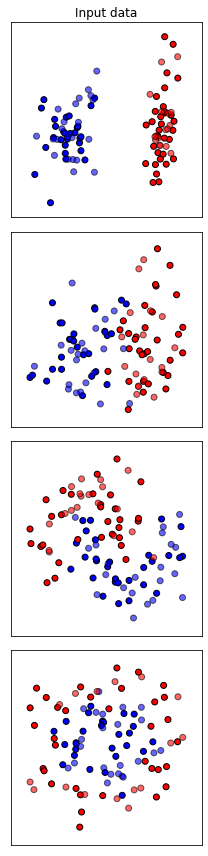

In [6]:
# plot each dataset:
h = .02  # step size in the mesh
figure = plt.figure(figsize=(3, 12))
i=1
for ds_cnt, ds in enumerate(datasets_train):
  X_train, y_train = ds
  X_test, y_test = datasets_test[ds_cnt]
  X = np.concatenate((X_train,X_test)) # all data
  x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
  y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
  # just plot the dataset first
  cm = plt.cm.RdBu
  cm_bright = ListedColormap(['#FF0000', '#0000FF'])
  ax = plt.subplot(len(datasets), 1, i)
  if ds_cnt == 0:
      ax.set_title("Input data")
  # Plot the training points
  ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
              edgecolors='k')
  # Plot the testing points
  ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
              edgecolors='k')
  ax.set_xlim(xx.min(), xx.max())
  ax.set_ylim(yy.min(), yy.max())
  ax.set_xticks(())
  ax.set_yticks(())
  i+=1

plt.tight_layout()
plt.show()

**Question:**
Which dataset is linearly separable?

#Linear SVM VS Kernel SVM
For each dataset we fit a linear SVM and a kernel SVM using the Gaussian radial basis function

$$
k(x,x') = e^{-\gamma \|x-x'\|}.
$$

For each classifier, the accuracy is displayed in the plot. Recall that the accuray is the ratio of well-classified points among all points:
$$
\text{Accuracy} = \frac{\text{TP}+\text{TN}}{\text{TP}+\text{FP}+\text{TN}+ \text{FN}}
$$



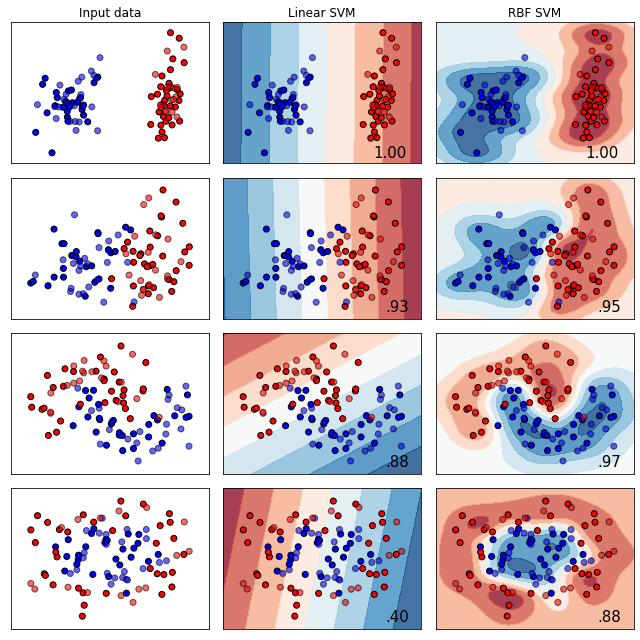

In [21]:


names = ["Linear SVM", "RBF SVM"]
classifiers = [SVC(kernel="linear", C=0.025), SVC(gamma=2, C=1)]

figure = plt.figure(figsize=(9, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets_train):
  X_train, y_train = ds
  X_test, y_test = datasets_test[ds_cnt]
  X = np.concatenate((X_train,X_test)) # all data

  x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
  y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))

  # just plot the dataset first
  cm = plt.cm.RdBu
  cm_bright = ListedColormap(['#FF0000', '#0000FF'])
  ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
  if ds_cnt == 0:
      ax.set_title("Input data")
  # Plot the training points
  ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
              edgecolors='k')
  # Plot the testing points
  ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
              edgecolors='k')
  ax.set_xlim(xx.min(), xx.max())
  ax.set_ylim(yy.min(), yy.max())
  ax.set_xticks(())
  ax.set_yticks(())
  i += 1

  # iterate over classifiers
  for name, clf in zip(names, classifiers):
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
      Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
      Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                edgecolors='k', alpha=0.6)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    if ds_cnt == 0:
      ax.set_title(name)
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')
    i += 1

plt.tight_layout()
plt.show()






Classification report for classifier SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=2, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False):
              precision    recall  f1-score   support

           0       0.76      1.00      0.86        16
           1       1.00      0.79      0.88        24

    accuracy                           0.88        40
   macro avg       0.88      0.90      0.87        40
weighted avg       0.90      0.88      0.88        40


Confusion matrix:
[[16  0]
 [ 5 19]]


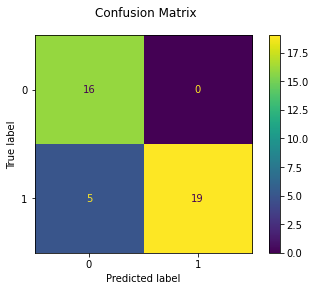

In [22]:
classifier = clf
classifier.score(X_test,y_test)
predicted = classifier.predict(X_test)
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)



##Exercice

Define two additional classifiers using the Gaussian RBF kernel with other $\gamma$ values. 
Chose extreme values of $\gamma$ for which:
 - The first new SVM classifier is close to a linear classifier
 - The second new SVM classifier suffers from overfitting